<a href="https://colab.research.google.com/github/dajebbar/FreeCodeCamp-python-data-analysis/blob/main/Overfit_generalization_underfit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# Overfit-generalization-underfit
---

We will put these two errors (training and testing errors) into perspective and show how they can help us know if our model generalizes, overfits, or underfits.

Let's first load the data and create the model.

In [1]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing(as_frame=True)
data, target = housing.data, housing.target
target *= 100  # rescale the target in k$

In [2]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor()

Overfitting vs. underfitting
To better understand the generalization performance of our model and maybe find insights on how to improve it, we will compare the testing error with the training error. Thus, we need to compute the error on the training set, which is possible using the `cross_validate` function.

In [5]:
import pandas as pd
from sklearn.model_selection import cross_validate, KFold

cv = KFold(n_splits=10, shuffle=True, random_state=42)
cv_results = cross_validate(regressor,
                            data,
                            target,
                            scoring='neg_mean_absolute_percentage_error',
                            return_train_score=True, 
                            n_jobs=2,
                            )
cv_results = pd.DataFrame(cv_results)
cv_results[['train_error', 'test_error']] = -cv_results[['train_score','test_score']]
cv_results.head()

,fit_time,score_time,test_score,train_score,train_error,test_error
0,0.307118,0.004160,-0.443029,-6.795584e-18,6.795584e-18,0.443029
1,0.319030,0.004977,-0.281443,-6.506410e-18,6.506410e-18,0.281443
2,0.288021,0.004439,-0.309689,-2.953704e-17,2.953704e-17,0.309689
3,0.314271,0.004316,-0.387510,-7.718186e-18,7.718186e-18,0.387510
4,0.220471,0.003016,-0.307164,-1.804582e-17,1.804582e-17,0.307164


In [6]:
scores = cv_results[['train_error', 'test_error']]
scores.head()

,train_error,test_error
0,6.795584e-18,0.443029
1,6.506410e-18,0.281443
2,2.953704e-17,0.309689
3,7.718186e-18,0.387510
4,1.804582e-17,0.307164


Text(0.5, 1.0, 'Train and test errors distribution via cross-validation')

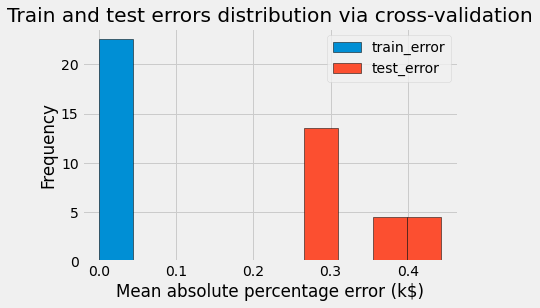

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns 
plt.style.use('fivethirtyeight')

scores.plot.hist(bins=10, edgecolor="black", density=True)
plt.xlabel("Mean absolute percentage error (k$)")
plt.title("Train and test errors distribution via cross-validation")

By plotting the distribution of the training and testing errors, we get information about whether our model is over-fitting, under-fitting (or both at the same time).

Here, we observe a small training error (actually zero), meaning that the model is not under-fitting: it is flexible enough to capture any variations present in the training set.